<a href="https://colab.research.google.com/github/itzem-vg/Final/blob/main/FINAL-IA/0.%20Reconocedor_De_Pinturas_Bolivianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL IA 1
Velasquez Guerra Itzel Emily

Ingenieria en Diseño y Animacion Digital


**Idea de Proyecto:**  Reconocedor de Pinturas en Museos de Sucre

**Aplicación en la vida real:**
El proyecto está diseñado para facilitar la experiencia de los turistas que visitan los museos de la ciudad de Sucre. Permite identificar obras de arte mediante una fotografía. Al cargar la imagen, la herramienta proporcionará el nombre de la pintura.

**Método a utilizar:**
El sistema empleará aprendizaje supervisado mediante redes neuronales, entrenadas con un conjunto de datos previamente etiquetados que incluyen imágenes y descripciones de pinturas.

ENLACE A DATOS DE IMAGENES:  [Imag](https://drive.google.com/drive/folders/17QJ6DhKp2yTK1J06XAcXhi1leqvlHLN8?usp=sharing)

ENLACE A IMAGENES SIN ETIQUETAS: [Pruebas](https://drive.google.com/drive/folders/1lS8TRNTV1PdoWTpXfN8vtpx0J04koPpt?usp=sharing)

--------------------------------------------------------------

In [5]:
import os # listar carpetas y archivos dentro de un directorio
import cv2 #librería para procesamiento de imágenes y visión por computadora.
          #Uso aquí: Leer imágenes ( cv2.imread) en escala de grises y redimensionarlas ( cv2.resize).

import numpy as np #Convertir listas de datos en arreglos NumPy, más eficientes y compatibles con bibliotecas de IA.
import matplotlib.pyplot as plt #Librería para crear gráficos y visualizaciones.


from sklearn.model_selection import train_test_split #Divide datos en conjuntos de entrenamiento y prueba.

#construir y entrenar el modelo de red neuronal.
from tensorflow.keras.models import Sequential #Crear un modelo de red neuronal secuencial, las capas se añaden una tras otra.
from tensorflow.keras.layers import Dense, Flatten # Definir capas densas (completamente conectadas) en tu red neuronal, que son las capas básicas de procesamiento.
                                                  #Convertir la entrada (2D) en un vector 1D para que pueda ser procesada por las capas densas.

from tensorflow.keras.utils import to_categorical #Convertir etiquetas numéricas en un formato llamado "one-hot encoding", necesario para la clasificación multiclase.


from sklearn.preprocessing import LabelEncoder # usa para codificar etiquetas (LabelEncoder)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




`cargar_datos`


- La función graba todas las carpetas (clases) dentro de data_dir.
- Por cada imagen válida, la lee, la convierte a escala de grises, la redimensiona y la agrega junto con su etiqueta correspondiente a las listas Xe y.
- Devuelve las imágenes procesadas ( X) y sus etiquetas ( y) como arreglos de NumPy, listos para ser divididos en conjuntos de entrenamiento y prueba, o para ser usados ​​directamente en un modelo de IA.

In [6]:
# Configuración inicial

IMG_SIZE = 128  # Tamaño al que redimensionaremos las imágenes
#DATA_DIR = '/content/Datos'  # Ruta a tu carpeta de imágenes
DATA_DIR = '/content/drive/MyDrive/USFXCH/IA/Final3class/Dataset'


# Función para cargar y procesar imágenes
def cargar_datos(data_dir):
    X = []
    y = []
    for label in os.listdir(data_dir):
        """Usa os.listdir(data_dir)para obtener una lista de todas las carpetas o archivos dentro del directorio data_dir.
        Itera sobre cada elemento en esta lista, almacenando su nombre en label.
        Cada label corresponde a una carpeta cuyo nombre representa una clase."""

        label_path = os.path.join(data_dir, label) #Combine la ruta base data_dircon el nombre de la carpeta label usando os.path.join.

        if os.path.isdir(label_path):
            """Verifica si label_pathhay un directorio (alfombra) con os.path.isdir."""
            for img_name in os.listdir(label_path):
                """Itera sobre cada archivo dentro de la carpeta, suponiendo que son nombres de imágenes, y guarda el nombre de cada archivo """

                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                #cv2.IMREAD_GRAYSCALE-la imagen se lea en escala de grises (1 canal en lugar de 3, lo que ahorra memoria y simplifica el procesamiento)

                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    #Redimensiona la imagen a un tamaño
                    X.append(img)
                    y.append(label)
    return np.array(X), np.array(y)

# Cargar datos
X, y = cargar_datos(DATA_DIR)

## Cantidad por clase

`etiquetas_y_cantidad = Counter(y)` Contar la frecuencia de cada etiqueta

`print("Etiquetas y cantidad de datos:") for etiqueta, cantidad in etiquetas_y_cantidad.items(): print(f"- {etiqueta}: {cantidad} imágenes")` Mostrar las etiquetas y sus cantidades

In [ ]:
from collections import Counter

# Contar la frecuencia de cada etiqueta
etiquetas_y_cantidad = Counter(y)

# Mostrar las etiquetas y sus cantidades
print("Etiquetas y cantidad de datos:")
for etiqueta, cantidad in etiquetas_y_cantidad.items():
    print(f"- {etiqueta}: {cantidad} imágenes")

Etiquetas y cantidad de datos:
- Juana_Azurduy: 81 imágenes
- Simon_Bolivar: 80 imágenes
- Tupac_Katari: 80 imágenes


<ipython-input-42-48a8319a5a48>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_etiquetas) # Puedes cambiar 'viridis' por otra paleta de colores


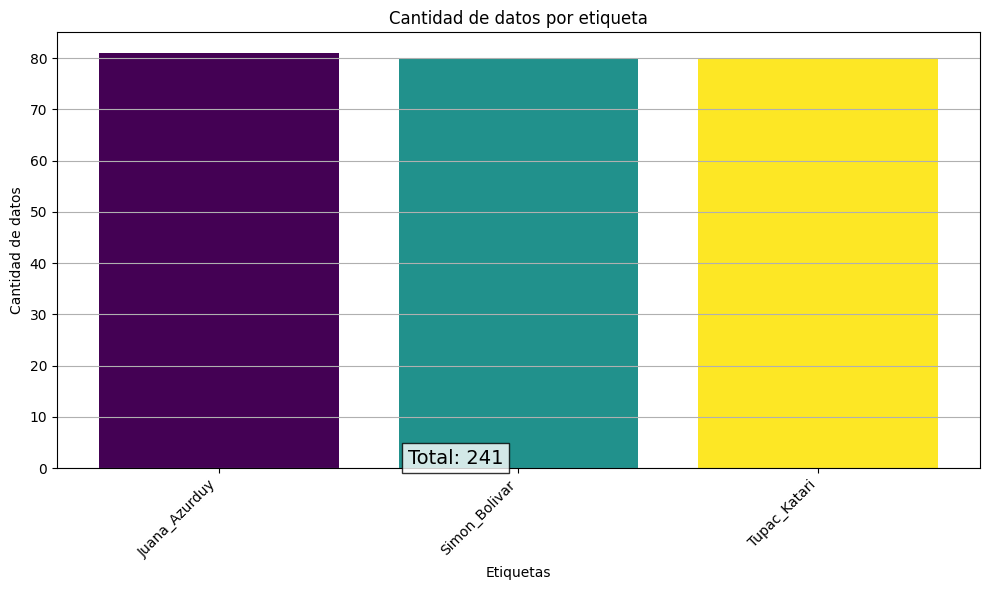

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# Obtener etiquetas y cantidades
etiquetas = list(etiquetas_y_cantidad.keys())
cantidades = list(etiquetas_y_cantidad.values())

# Generar colores para las barras
num_etiquetas = len(etiquetas)
cmap = plt.cm.get_cmap('viridis', num_etiquetas) # Puedes cambiar 'viridis' por otra paleta de colores
colores = [cmap(i) for i in range(num_etiquetas)]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(etiquetas, cantidades, color=colores)
plt.title('Cantidad de datos por etiqueta')
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad de datos')
plt.xticks(rotation=45, ha='right')

# Agregar cuadrícula horizontal
plt.grid(axis='y')

# Agregar resumen con recuadro
total_datos = sum(cantidades)
plt.text(0.95, 0.05, f'Total: {total_datos}',
         ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=14)  # Recuadro con fondo blanco

plt.tight_layout()
plt.show()

##Normalizacion de imagenes
1. **Normalización de imágenes:** Se convierten los valores de los píxeles de las imágenes a un rango entre 0.0 y 1.0 y se transforman para que representen imágenes en escala de grises.
2. **Codificación de etiquetas:** Se transforman las etiquetas de texto (nombres de las clases) a un formato numérico que el modelo pueda entender.
3. **División de datos:** Se separa el conjunto de datos en dos partes: una para entrenar el modelo (entrenamiento) y otra para evaluar su rendimiento (prueba).

In [ ]:
# Normalizar imágenes
X = X.astype('float32') / 255.0
"""Divide cada valor de píxel por 255.0 para normalizar los valores en un rango de 0.0a 1.0"""
X = X.reshape(X.shape[0], IMG_SIZE, IMG_SIZE, 1)
"""transforman para representar imágenes con un solo canal (escala de grises)."""

# Codificar etiquetas
encoder = LabelEncoder()#para convertir las etiquetas de texto a números enteros.
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)# convierte estos números enteros en vectores one-hot encoded

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


##MODELO
Estas líneas de código definen, compilan, entrenan y evalúan un modelo de Red Neuronal Artificial (RNA) usando la librería Keras de TensorFlow. El modelo es una RNA secuencial, que significa que las capas se apilan una encima de la otra.

---------------------------

1. Definición del modelo `(model = Sequential(...))`
2. Compilación del modelo `(model.compile(...))`
3. Entrenamiento del modelo `(history = model.fit(...))`
4. Visualización del entrenamiento `(plt.plot(...))`

---------------------------
- **Creación de un modelo de clasificación:** Son el núcleo del proceso, ya que definen la arquitectura de la RNA que se utilizará para clasificar las imágenes.
- **Entrenamiento y evaluación:** El entrenamiento permite que el modelo aprenda a reconocer patrones en las imágenes y la evaluación nos ayuda a comprender su rendimiento y capacidad de generalización.
- **Visualización:** Los gráficos de precisión nos dan una idea de cómo el modelo está aprendiendo y si está sobreajustando o no a los datos de entrenamiento.

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4247 - loss: 4.7266 - val_accuracy: 0.3061 - val_loss: 1.5679
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4882 - loss: 1.3564 - val_accuracy: 0.3878 - val_loss: 1.7432
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4701 - loss: 1.4211 - val_accuracy: 0.2857 - val_loss: 2.0261
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5443 - loss: 1.1043 - val_accuracy: 0.5714 - val_loss: 1.1814
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6285 - loss: 0.7445 - val_accuracy: 0.3061 - val_loss: 1.9239
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6128 - loss: 0.9518 - val_accuracy: 0.5918 - val_loss: 0.9799
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6632 - loss: 0.7374 - val_accuracy: 0.6122 - val_loss: 0.8934
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8713 - loss: 0.4708 - val_accuracy: 0.6327 - val_loss: 0.

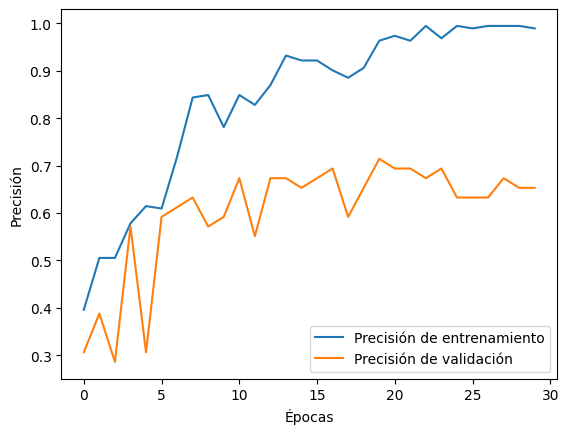

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6541 - loss: 0.8961
Precisión en los datos de prueba: 65.31%


In [ ]:

# Crear el modelo
model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 1)), #Convierte cada imagen 2D en un vector 1D.
    Dense(128, activation='relu'), #Crea una capa con 128 neuronas y la función de activación ReLU
    Dense(64, activation='relu'), #Una capa con 64 neuronas (Unidad Lineal Rectificada).
    Dense(len(encoder.classes_), activation='softmax')#función de activación softmaxconvierte los valores en probabilidades.
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
""""
Optimizador: adam , un algoritmo eficiente para ajustar los pesos.
Función de pérdida: categorical_crossentropy , adecuada para clasificación multiclase.
Métrica: accuracy , para monitorear la precisión del modelo.
"""

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=16)
"""
Entrena el modelo durante 30 épocas.
Valida el rendimiento en cada época con los datos de prueba ( X_test, y_test).
batch_size=16significa que los datos se procesan en lotes de 16 imágenes.
La variable history guarda métricas como precisión y pérdida para cada época.
"""

# Visualizar métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en los datos de prueba: {accuracy * 100:.2f}%")




#DATOS AUMENTADOS
Vamos a generar nuevo datos, para uamentar la cantidad y el modelo pueda tener mas presicion.

En base a los datos que tenemos, se les aplica algunas variaciones, como su rotacion, zoom entre otros.

-------------------------

`albumentations` es una librería de Python que se utiliza para el aumento de datos (data augmentation) en visión artificial.

 El aumento de datos es una técnica que consiste en crear nuevas imágenes a partir de las imágenes originales, aplicando transformaciones como rotaciones, recortes, cambios de brillo, etc.

In [1]:
!pip install albumentations==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [2]:
from IPython import get_ipython # Permite acceder a la funcionalidad de IPython para interactuar con el kernel.
from IPython.display import display # Permite mostrar objetos como imágenes o gráficos en el notebook.

import os  # En tu código, se usa para recorrer las carpetas de imágenes.
import cv2 # Se utiliza para leer, redimensionar y convertir imágenes a escala de grises.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #dividir los datos en entrenamiento y prueba.
from tensorflow.keras.models import Sequential # Clase para crear modelos de redes neuronales secuenciales.
from tensorflow.keras.layers import Dense, Flatten #Capas para construir la red neuronal: Dense (capa densa) y Flatten (aplanamiento).
from tensorflow.keras.utils import to_categorical #Función para convertir etiquetas a codificación one-hot.
from sklearn.preprocessing import LabelEncoder #Clase para codificar etiquetas de texto a valores numéricos.

import albumentations as A # Librería para realizar aumento de datos en imágenes.


## Importamos nuestros datos

In [7]:
# Configuración inicial
IMG_SIZE = 128  # Tamaño al que redimensionaremos las imágenes
#DATA_DIR = '/content/Datos'  # Ruta a tu carpeta de imágenes
DATA_DIR = '/content/drive/MyDrive/USFXCH/IA/Final3class/Dataset'

# Función para cargar y procesar imágenes
def cargar_datos(data_dir):
    X = []
    y = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)#Construcción de la ruta

        if os.path.isdir(label_path): #Verificación de que es una carpeta
            for img_name in os.listdir(label_path): #Bucle para cada imagen dentro de la carpeta
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #Redimensionamiento y almacenamiento
                    X.append(img)
                    y.append(label)
    return np.array(X), np.array(y)

# Cargar datos
X, y = cargar_datos(DATA_DIR)


##Normalizar datos
la normalización de datos es una práctica recomendada para mejorar el rendimiento y la eficiencia del entrenamiento de modelos de aprendizaje automático.

In [8]:
# Normalizar imágenes
X = X.astype('float32') / 255.0
X = X.reshape(X.shape[0], IMG_SIZE, IMG_SIZE, 1)

##Aumento de Datos
Crea nuevas imágenes modificadas a partir de las originales aplicando rotaciones y recortes aleatorios. Esto ayuda a aumentar la cantidad de datos de entrenamiento y a mejorar la generalización del modelo.

In [9]:
# Aumento de datos con Albumentations
transform = A.Compose([
    A.Rotate(limit=90, p=0.9),
    A.RandomResizedCrop(IMG_SIZE, IMG_SIZE, scale=(0.8, 1.0), ratio=(0.8, 1.2), p=0.9),
])
"""
    Recorta aleatoriamente una porción de la imagen con un tamaño entre el 80% y el 100% del original.
    Ajusta las proporciones del recorte entre 0,8 y 1,2.
    Redimensiona el recorte al tamaño (IMG_SIZE, IMG_SIZE).

    """
"""],
    # Agrega la siguiente línea para evitar errores cuando la transformación no modifica la imagen:
    additional_targets={'image': 'image'}
)"""

def augment_data(X, y, n_augmentations_per_image=5):
    X_augmented = []
    y_augmented = []

    for i in range(len(X)):
        image = X[i].reshape(IMG_SIZE, IMG_SIZE, 1)
        image = (image * 255).astype(np.uint8)  # Desnormalizar para aplicar transformaciones
        label = y[i]

        for _ in range(n_augmentations_per_image):#Aplicar transformaciones
            augmented = transform(image=image) # El argumento 'image' debe ser tu dato de imagen.
            augmented_image = augmented['image']
            augmented_image = augmented_image.astype('float32') / 255.0  # Normalizar de nuevo
            augmented_image = augmented_image.reshape(IMG_SIZE, IMG_SIZE, 1)
            X_augmented.append(augmented_image)
            y_augmented.append(label)

    return np.array(X_augmented), np.array(y_augmented)

# Aplicar aumento de datos a todo el conjunto inicial
X_augmented, y_augmented = augment_data(X, y)

# Combinar datos originales y aumentados
X_combined = np.concatenate([X, X_augmented])
y_combined = np.concatenate([y, y_augmented])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Codificar etiquetas *después* de la división
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_train_categorical = to_categorical(y_train_encoded)

y_test_encoded = encoder.transform(y_test) # Usamos transform, no fit_transform
y_test_categorical = to_categorical(y_test_encoded)


print("Cantidad de datos de entrenamiento X:", len(X_train))
print("Cantidad de datos de entrenamiento Y:", len(y_train_categorical))

print("Cantidad de datos de prueba X:", len(X_test))
print("Cantidad de datos de prueba Y:", len(y_test_categorical))

Cantidad de datos de entrenamiento X: 1156
Cantidad de datos de entrenamiento Y: 1156
Cantidad de datos de prueba X: 290
Cantidad de datos de prueba Y: 290


## Ver Imagenes generadas como aumento

mostrar una selección de imágenes que han sido aumentadas mediante las transformaciones que definiste anteriormente. Esto te permite inspeccionar visualmente cómo se ven las imágenes después de aplicar las transformaciones y comprobar si el aumento de datos está funcionando como esperas.

-----------------------

`fig, axes = plt.subplots(1, n, figsize=(n * 3, 3))`

Crea una figura y un conjunto de subtramas usando matplotlib.pyplot.subplots.
`1, n`: Indica que se creará una fila con n columnas (es decir, n subtramas).
`figsize=(n * 3, 3)`: Define el tamaño de la figura, ajustándolo al número de imágenes a mostrar.

In [10]:
def visualizar_aumentadas(X_aumentado, n=5):
    """
    Visualiza solo las imágenes aumentadas.
    Args:
        X_aumentado (array): Conjunto de imágenes aumentadas.
        n (int): Número de ejemplos a mostrar.
    """
    fig, axes = plt.subplots(1, n, figsize=(n * 3, 3))
    for i in range(n):
        axes[i].imshow(X_aumentado[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        axes[i].set_title(f"Aumentada {i + 1}")
        axes[i].axis('off')  # Oculta los ejes
    plt.tight_layout()
    plt.show()


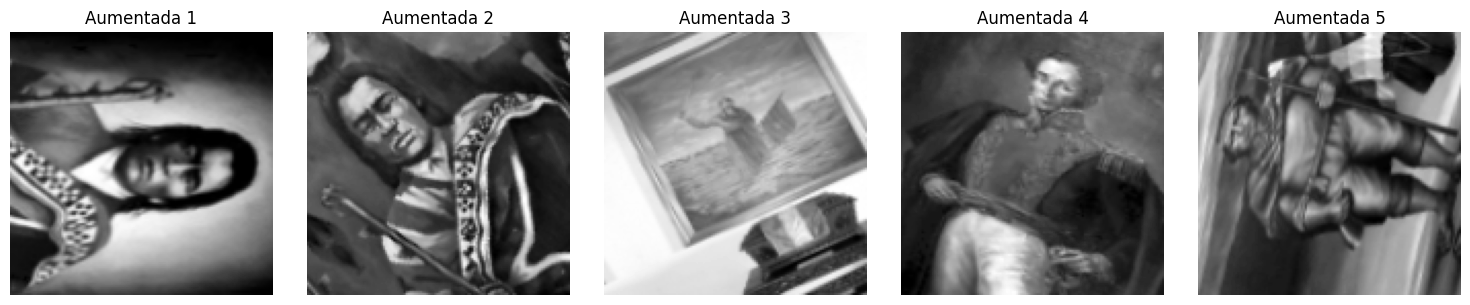

In [11]:
# Número de imágenes aumentadas a visualizar
n_imagenes = 5

# Generar índices aleatorios
indices_aleatorios = np.random.choice(len(X_augmented), n_imagenes, replace=False)

# Seleccionar imágenes aumentadas aleatoriamente
X_aumentado_sample = X_augmented[indices_aleatorios]

# Visualizar solo las imágenes aumentadas
visualizar_aumentadas(X_aumentado_sample, n=n_imagenes)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3995 - loss: 2.2602 - val_accuracy: 0.3414 - val_loss: 1.5197
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4761 - loss: 1.2713 - val_accuracy: 0.5103 - val_loss: 1.0565
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5594 - loss: 0.9740 - val_accuracy: 0.4414 - val_loss: 1.2817
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6008 - loss: 0.9087 - val_accuracy: 0.3517 - val_loss: 1.6602
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5043 - loss: 1.1436 - val_accuracy: 0.4621 - val_loss: 1.2794
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5909 - loss: 0.9046 - val_accuracy: 0.4724 - val_loss: 1.0764
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5738 - loss: 0.9610 - val_accuracy: 0.5138 - val_loss: 1.0352
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6269 - loss: 0.8330 - val_accuracy: 0.5207 - v

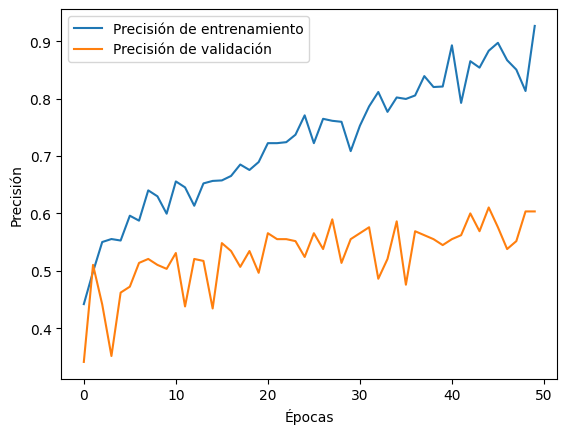

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5911 - loss: 1.3298 
Precisión en los datos de prueba: 60.34%


In [13]:
# Crear el modelo
model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con datos aumentados y etiquetas codificadas
history = model.fit(X_train, y_train_categorical, epochs=50, validation_data=(X_test, y_test_categorical), batch_size=16)

# Visualizar métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Precisión en los datos de prueba: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


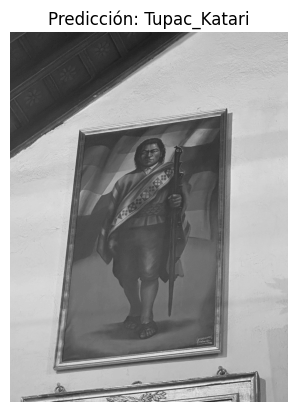

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


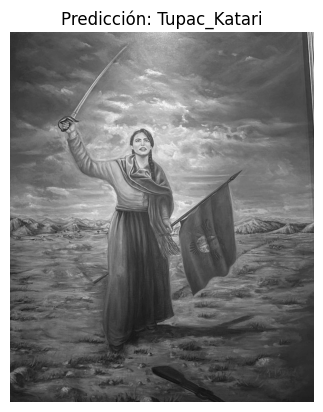

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


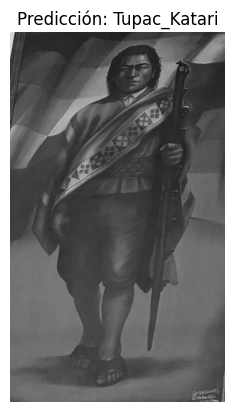

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


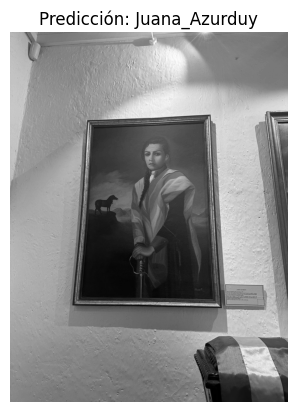

La imagen pertenece a la clase: Juana_Azurduy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


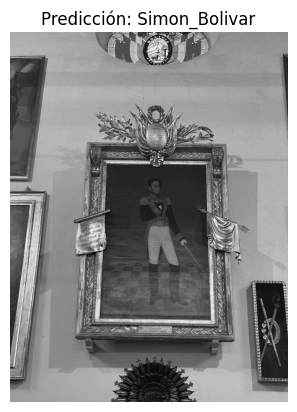

La imagen pertenece a la clase: Simon_Bolivar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


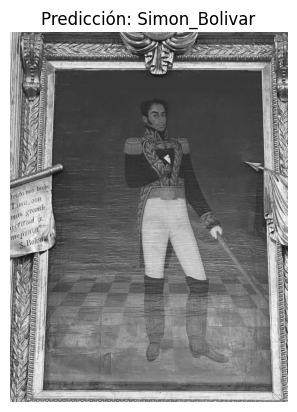

La imagen pertenece a la clase: Simon_Bolivar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


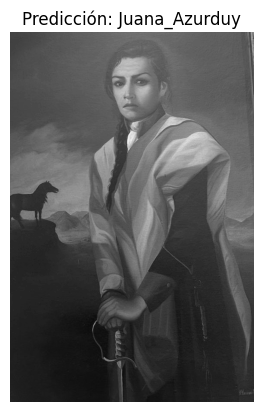

La imagen pertenece a la clase: Juana_Azurduy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


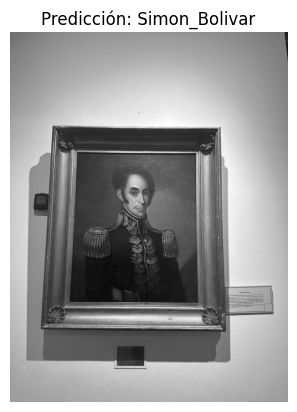

La imagen pertenece a la clase: Simon_Bolivar


"ruta_imagen = '/content/drive/MyDrive/USFXCH/IA/Final3class/Ejemplos_Prueba/10.jpeg'\npredecir_imagen(ruta_imagen)"

In [14]:
import matplotlib.pyplot as plt

def predecir_imagen(ruta_imagen):
    # Verify if the image file exists
    if not os.path.exists(ruta_imagen):
        print(f"Error: La imagen no se encuentra en la ruta: {ruta_imagen}")
        return None

    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: No se pudo cargar la imagen: {ruta_imagen}")
        return None

    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize for prediction
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = img_resized.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    prediccion = model.predict(img_resized)
    clase = encoder.inverse_transform([np.argmax(prediccion)])

    # Display the image and predicted label
    plt.imshow(img, cmap='gray')  # Display original image in grayscale
    plt.title(f"Predicción: {clase[0]}")
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"La imagen pertenece a la clase: {clase[0]}")
    return clase[0]

# Ejemplo de predicción
for i in range(1, 9):  # Iterar del 1 al 10
    ruta_imagen = f'/content/drive/MyDrive/USFXCH/IA/Final3class/Ej2-Prueba/{i}.jpeg'

    predecir_imagen(ruta_imagen)



"""ruta_imagen = '/content/drive/MyDrive/USFXCH/IA/Final3class/Ejemplos_Prueba/10.jpeg'
predecir_imagen(ruta_imagen)"""

# Creamos modelos con Redes Neuronales Convoluciones

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 46s 584ms/step - accuracy: 0.3552 - loss: 1.0874 - val_accuracy: 0.5517 - val_loss: 0.9542
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 585ms/step - accuracy: 0.5912 - loss: 0.8932 - val_accuracy: 0.6517 - val_loss: 0.8190
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 534ms/step - accuracy: 0.7035 - loss: 0.6825 - val_accuracy: 0.6655 - val_loss: 0.8249
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 557ms/step - accuracy: 0.8253 - loss: 0.4517 - val_accuracy: 0.6034 - val_loss: 1.0688
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 530ms/step - accuracy: 0.8238 - loss: 0.4394 - val_accuracy: 0.7448 - val_loss: 0.7268
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 557ms/step - accuracy: 0.9081 - loss: 0.2389 - val_accuracy: 0.7931 - val_loss: 0.6735
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 533ms/step - accuracy: 0.9367 - loss: 0.2002 - val_accuracy: 0.7897 - val_loss: 0.7535
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 568ms/step - accuracy: 0.9487 - loss: 0.1437 - val_accu

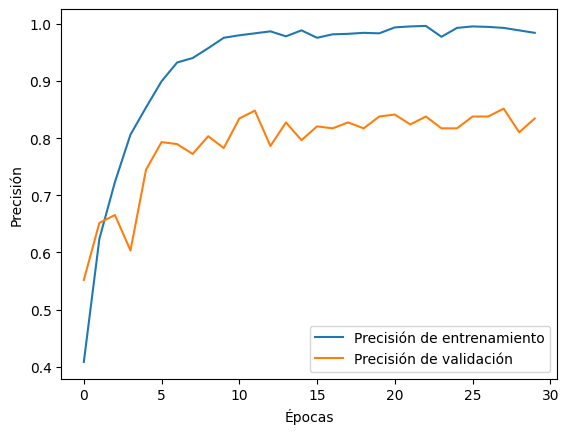

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.8199 - loss: 1.0384
Precisión en los datos de prueba: 83.45%


In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Crear el modelo CNN
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),  # Reduce las dimensiones espaciales

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar antes de pasar a las capas densas
    Flatten(),

    # Capa densa con Dropout para evitar sobreajuste
    Dense(128, activation='relu'),
    Dropout(0.5),  # Apaga el 50% de las neuronas durante el entrenamiento

    # Capa de salida para clasificación
    Dense(len(encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical,
                    epochs=30,
                    validation_data=(X_test, y_test_categorical),
                    batch_size=16)

# Visualizar métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Precisión en los datos de prueba: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


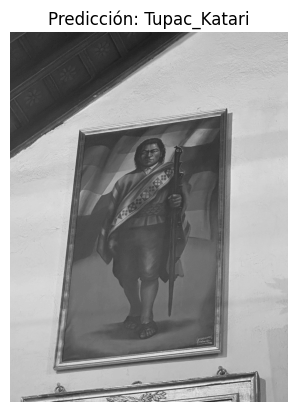

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


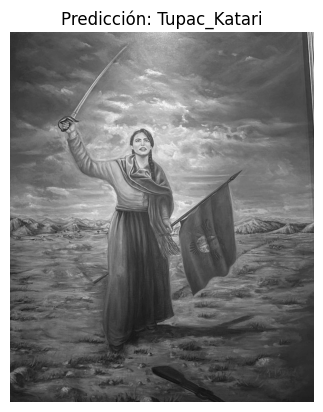

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


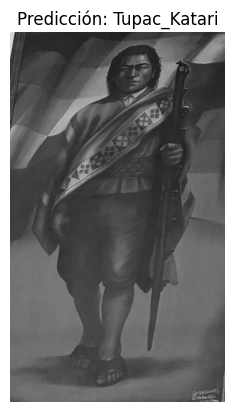

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


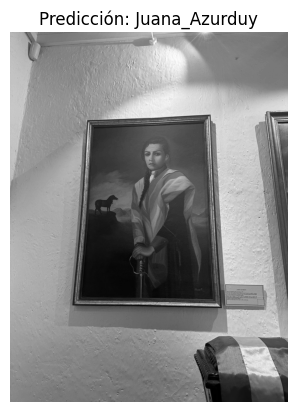

La imagen pertenece a la clase: Juana_Azurduy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


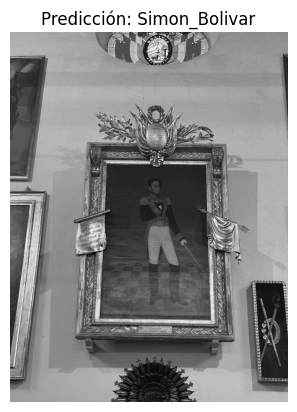

La imagen pertenece a la clase: Simon_Bolivar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


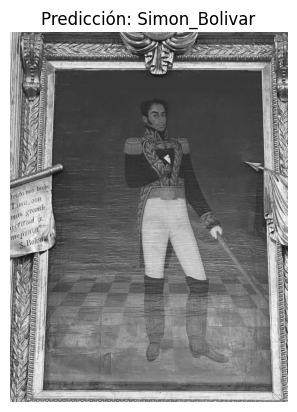

La imagen pertenece a la clase: Simon_Bolivar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


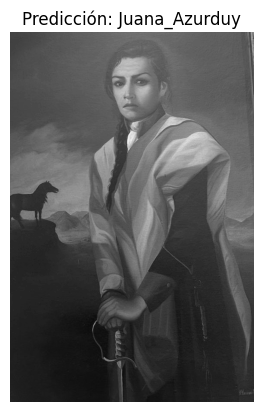

La imagen pertenece a la clase: Juana_Azurduy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


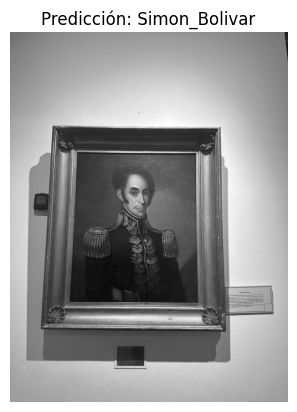

La imagen pertenece a la clase: Simon_Bolivar


"ruta_imagen = '/content/drive/MyDrive/USFXCH/IA/Final3class/Ejemplos_Prueba/10.jpeg'\npredecir_imagen(ruta_imagen)"

In [ ]:
import matplotlib.pyplot as plt

def predecir_imagen(ruta_imagen):
    # Verify if the image file exists
    if not os.path.exists(ruta_imagen):
        print(f"Error: La imagen no se encuentra en la ruta: {ruta_imagen}")
        return None

    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: No se pudo cargar la imagen: {ruta_imagen}")
        return None

    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize for prediction
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = img_resized.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    prediccion = model.predict(img_resized)
    clase = encoder.inverse_transform([np.argmax(prediccion)])

    # Display the image and predicted label
    plt.imshow(img, cmap='gray')  # Display original image in grayscale
    plt.title(f"Predicción: {clase[0]}")
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"La imagen pertenece a la clase: {clase[0]}")
    return clase[0]

# Ejemplo de predicción
for i in range(1, 9):  # Iterar del 1 al 10
    ruta_imagen = f'/content/drive/MyDrive/USFXCH/IA/Final3class/Ej2-Prueba/{i}.jpeg'

    predecir_imagen(ruta_imagen)



"""ruta_imagen = '/content/drive/MyDrive/USFXCH/IA/Final3class/Ejemplos_Prueba/10.jpeg'
predecir_imagen(ruta_imagen)"""

In [15]:
import matplotlib.pyplot as plt

def predecir_imagen(ruta_imagen, model, encoder, IMG_SIZE=128):
    """
    Predice la clase de una imagen usando el modelo CNN.

    Args:
        ruta_imagen (str): Ruta a la imagen que se va a predecir.
        model: Modelo CNN entrenado.
        encoder: Objeto LabelEncoder usado para codificar las etiquetas.
        IMG_SIZE (int): Tamaño de la imagen (por defecto, 128).

    Returns:
        str: Clase predicha para la imagen.
    """
    # Verificar si el archivo de imagen existe
    if not os.path.exists(ruta_imagen):
        print(f"Error: La imagen no se encuentra en la ruta: {ruta_imagen}")
        return None

    # Cargar y preprocesar la imagen
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: No se pudo cargar la imagen: {ruta_imagen}")
        return None
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32') / 255.0  # Normalizar
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)  # Añadir dimensión para el batch

    # Realizar la predicción
    prediccion = model.predict(img)
    clase_index = np.argmax(prediccion)  # Obtener el índice de la clase con mayor probabilidad
    clase = encoder.inverse_transform([clase_index])[0]  # Decodificar la etiqueta

    # Mostrar la imagen y la predicción
    plt.imshow(img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Predicción: {clase}")
    plt.axis('off')
    plt.show()

    print(f"La imagen pertenece a la clase: {clase}")
    return clase

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


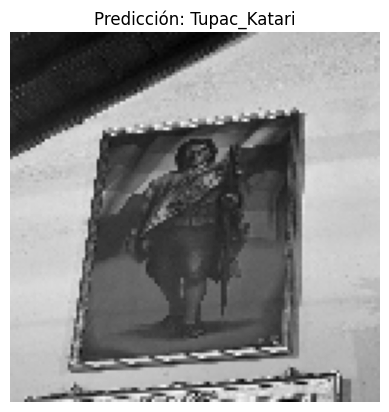

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


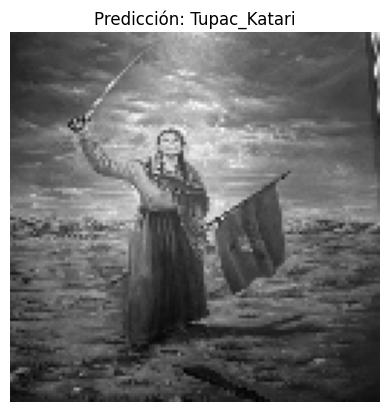

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


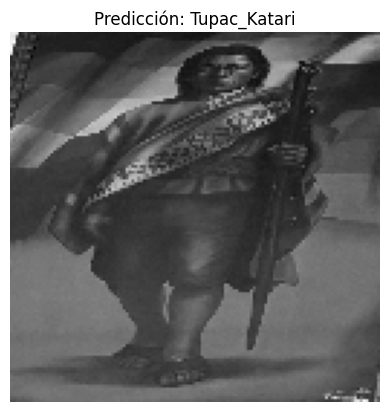

La imagen pertenece a la clase: Tupac_Katari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


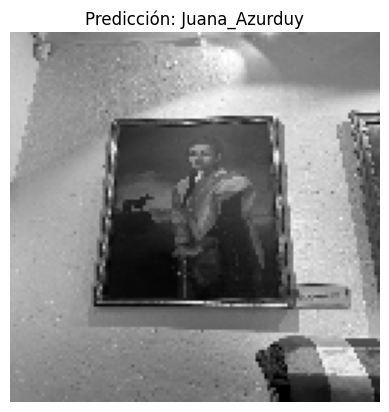

La imagen pertenece a la clase: Juana_Azurduy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


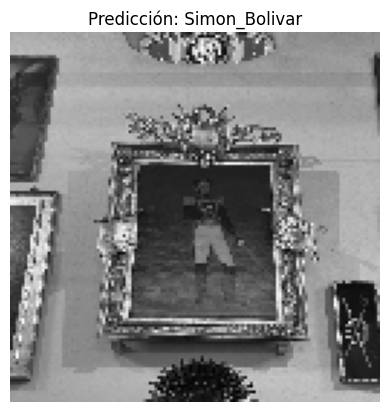

La imagen pertenece a la clase: Simon_Bolivar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


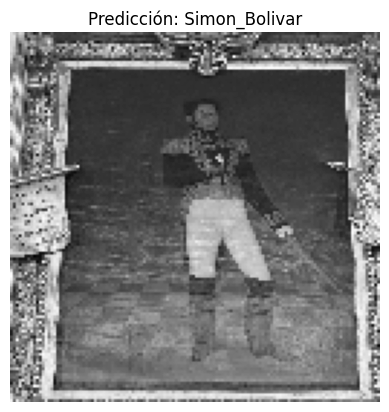

La imagen pertenece a la clase: Simon_Bolivar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


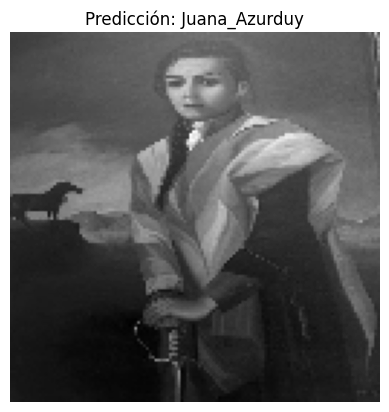

La imagen pertenece a la clase: Juana_Azurduy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


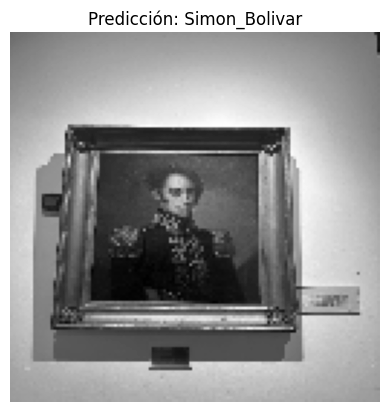

La imagen pertenece a la clase: Simon_Bolivar


In [16]:
"""# ... (código para cargar tu modelo CNN y el encoder) ...

ruta_imagen = '/ruta/a/tu/imagen.jpg'
clase_predicha = predecir_imagen(ruta_imagen, model, encoder)

print(f"Clase predicha: {clase_predicha}")
"""

# Ejemplo de predicción
for i in range(1, 9):  # Iterar del 1 al 10
    ruta_imagen = f'/content/drive/MyDrive/USFXCH/IA/Final3class/Ej2-Prueba/{i}.jpeg'

    clase_predicha = predecir_imagen(ruta_imagen, model, encoder)

#Concluciones
Este proyecto buscó desarrollar una herramienta para identificar pinturas mediante redes neuronales. El modelo inicial, entrenado con pocos datos originales, obtuvo una precisión del 69%.

Para mejorar el rendimiento, se implementó el aumento de datos con `Albumentations`, generando nuevas imágenes a partir de las originales. Gracias a esta técnica, la precisión del modelo se elevó a un 82%.

En conclusión, el aumento de datos demostró ser crucial para mejorar la precisión del modelo, especialmente con conjuntos de datos limitados. Esto permite un modelo más robusto y una mejor experiencia para los usuarios al identificar obras de arte.